# Taxi Q-Learning Project

#### By: Aaron Shyuu

### Problem & Environment

In this project, I will use the new taxi-v3 environment in OpenAI Gym to solve a Reinforcement Learning problem and test my Reinforcement Learning algorithms. Furthermore, I will use visualizations to compare the two RL algorithms.

### Goal: 

In this game, the taxi is our agent and it needs to deliver a passenger to their destination.

### Description: 

There are four designated locations in the grid world indicated by R, G, Y, and B. When the episode starts, the taxi starts off at a random square and the passenger is at a random location. The taxi drives to the passenger's location, picks up the passenger, drives to the passenger's destination (another one of the four specified locations), and then drops off the passenger. Once the passenger is dropped off, the episode ends.

### Specifications: 

Number of states -> 500 

25 grid locations (of taxi) x 5 possible passenger locations (passenger can be in taxi) x 4 possible destinations = 500 

Possible actions -> 6 discrete and deterministic actions

Move South, North, East, West, Pickup passenger and Dropoff passenger

Possible rewards -> 

Each action/time step gives reward -1, Successfully delivering passenger gives reward +20, Illegal move (pickups and dropoffs) costs -10

### Display: 

R,G,B,Y are locations, blue indicates passenger, magneta indicates destination, yellow indicates empty taxi and green indicates full taxi

In [486]:
# Dont't forget to install gym
!pip install gym

In [487]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline
import seaborn as sns


In [488]:
# A taxi environment 
env = gym.make("Taxi-v3")
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [489]:
# Can verify state space
print("Action Space", env.action_space)
print("State Space", env.observation_space)

Action Space Discrete(6)
State Space Discrete(500)


### RL Method

I will be using Q-learning (an off policy RL algorithm) and another RL algorithm (likely an on policy algorithm like SARSA) to train my agent, determine the performence of each algorithm and compare them.

### Justification for Method

I have decided to use an off policy and an on policy RL algorithm to compare the performences for this problem. Q-learning is off policy so policy is updated greedily and independent of next policy. However, an on policy RL algorithm like SARSA will continually improve the policy (ie. policy is updated to improve next policy) It will be interesting for comparison. I have considered deep learning (neural networks) which can be implemented but it is excessive since our state space is not huge.

In terms of exploration and exploitation, SARSA variants explore while Q-learning does not. This means that SARSA is more conservative and allows penalties from exploratory moves. Q-learning attemps to find optimal solution directly while SARSA avoids dangerous paths. Clearly, there are pros and cons for each RL algorithm and it is worth analyzing.


### Q-Learning

Q Learning Algorithm:

Initialize Q-values Q(s,a) for all pairs

Repeat until completion ->

Choose an action a in current s based on current Q estimates

Take that action and observe s' and r

Perform update with Q(s,a) = Q(s,a) + alpha(r + gamma * maxQ(s'a') - Q(s,a))

In [490]:
# Initialize Q-Table

Q = np.zeros((env.observation_space.n, env.action_space.n))

In [491]:
#Set Hyperparameters

# Episodes for training 
episodesOfTraining = 50000

# Maximum steps per episode
max_steps = 99

# Learning rate
alpha = 0.1

#Discount factor
gamma = 0.9

# Exploration parameters
epsilon = 0.2               
max_epsilon = 1
min_epsilon = 0.01         
decay = 0.001       

#### Training

In [492]:
all_episode_rewards = []

for episode in range(episodesOfTraining):
    state = env.reset()    
    done = False
    reward_in_episode = 0
    
    # Exploration rate decay
    if epsilon > 0.01:
            epsilon = epsilon - decay
            
    for step in range(max_steps):
        #Choosing an action given the states based on a random num
        threshold = random.uniform(0, 1) 
         
        # Explaration-exploitation tradeoff
        #If threshold is larger than epsilon, exploit 
        if threshold > epsilon:
            action = np.argmax(Q[state,:])      
            
        # Explore otherwise by choosing random action
        else: 
            action = env.action_space.sample()
            
        # Perform action to get outcome state and reward
        new_state, reward, done, info = env.step(action)
        
        # Update Q-table
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action]) 
        
        # Update state and reward
        state = new_state
        reward_in_episode = reward_in_episode + reward
        
        if done:
            break
     
    all_episode_rewards.append(reward_in_episode)
    

#### Testing and Results

In [493]:
# Training score over time
print ("Training score over time: " + str(sum(all_episode_rewards) / episodesOfTraining))

# Average reward per thousand episodes
print("*** Avg. reward per thousand episodes ***\n")
reward_per_k_episodes = np.split(np.array(all_episode_rewards), episodesOfTraining / 1000)
count = 1000
for r in reward_per_k_episodes:
    print(count, ": " + str(sum(r/1000)))
    count = count + 1000


Training score over time: 5.06716
*** Avg. reward per thousand episodes ***

1000 : -95.74700000000021
2000 : -6.782000000000019
3000 : 6.867999999999965
4000 : 7.329999999999952
5000 : 7.4109999999999685
6000 : 7.34799999999997
7000 : 7.287999999999973
8000 : 7.384999999999963
9000 : 7.418999999999974
10000 : 7.479999999999954
11000 : 7.423999999999971
12000 : 7.327999999999969
13000 : 7.3689999999999625
14000 : 7.31499999999996
15000 : 7.454999999999958
16000 : 7.2929999999999655
17000 : 7.587999999999963
18000 : 7.250999999999971
19000 : 7.424999999999955
20000 : 7.51899999999997
21000 : 7.395999999999952
22000 : 7.311999999999968
23000 : 7.612999999999972
24000 : 7.503999999999962
25000 : 7.626999999999974
26000 : 7.362999999999967
27000 : 7.493999999999964
28000 : 7.435999999999959
29000 : 7.465999999999962
30000 : 7.6319999999999615
31000 : 7.344999999999964
32000 : 7.315999999999951
33000 : 7.46699999999997
34000 : 7.42099999999996
35000 : 7.613999999999962
36000 : 7.49099999999

#### Visualization Analysis

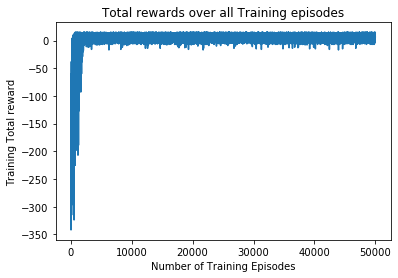

In [494]:
# Results and total reward over all training episodes

plt.title('Total rewards over all Training episodes')
plt.xlabel('Number of Training Episodes')
plt.ylabel('Training Total reward')

plt.plot(range(episodesOfTraining) , all_episode_rewards)
plt.show()

Q-Learning is off policy and uses greedy approach to learn the Q-value. On the other hand, SARSA is on policy and uses action performed by current policy to learn the Q-value.

### SARSA

In [495]:
Q = np.zeros((env.observation_space.n, env.action_space.n))

In [496]:
# Set Hyperparameters

# Episodes for training
episodesOfTraining = 50000

# Maximum steps per episode
max_steps = 99

# Learning rate
alpha = 0.1

#Discount factor
gamma = 0.9

# Exploration parameters
epsilon = 0.2               
max_epsilon = 1
min_epsilon = 0.01         
decay = 0.001

#### Training

In [497]:
all_episode_rewards = []

for episode in range(episodesOfTraining):
    state = env.reset()    
    done = False
    reward_in_episode = 0
    
    # Exploration rate decay
    if epsilon > 0.01:
        epsilon = epsilon - decay
    
    # Explaration-exploitation tradeoff
    #If threshold is larger than epsilon, exploit 
    if random.uniform(0, 1) > epsilon:
        action = np.argmax(Q[state,:]) 
        
    # Explore otherwise by choosing random action
    else: 
        action = env.action_space.sample()
        
    for step in range(max_steps):
        
        # Perform action to get new state and reward
        new_state, reward, done, info = env.step(action)
        
        # Explaration-exploitation tradeoff
        if random.uniform(0, 1) > epsilon:
            new_action = np.argmax(Q[new_state,:])            
        else: 
            new_action = env.action_space.sample()
        
        # Notice that we update Q-table differently now with s, a, r, s' and a'
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[new_state, new_action] - Q[state, action]) 
        
        # Update state
        state = new_state
        
        # Notice we need to update action for SARSA
        action = new_action
        
        # Update reward
        reward_in_episode = reward_in_episode + reward
        
        if done:
            break
            
    all_episode_rewards.append(reward_in_episode)


#### Testing and Results

In [498]:
# Training score over time
print ("Training score over time: " + str(sum(all_episode_rewards) / episodesOfTraining))

# Average reward per thousand episodes
print("*** Avg. reward per thousand episodes ***\n")
reward_per_k_episodes = np.split(np.array(all_episode_rewards), episodesOfTraining / 1000)
count = 1000
for r in reward_per_k_episodes:
    print(count, ": " + str(sum(r/1000)))
    count = count + 1000


Training score over time: 4.93652
*** Avg. reward per thousand episodes ***

1000 : -100.7920000000001
2000 : -7.4970000000000585
3000 : 6.1849999999999765
4000 : 7.430999999999955
5000 : 7.528999999999957
6000 : 7.417999999999965
7000 : 7.12599999999996
8000 : 7.535999999999965
9000 : 7.475999999999956
10000 : 7.402999999999961
11000 : 7.269999999999964
12000 : 7.396999999999964
13000 : 7.453999999999966
14000 : 7.187999999999972
15000 : 7.517999999999962
16000 : 7.361999999999963
17000 : 7.3909999999999645
18000 : 7.506999999999969
19000 : 7.294999999999968
20000 : 7.37999999999997
21000 : 7.28599999999997
22000 : 7.557999999999953
23000 : 7.699999999999948
24000 : 7.169999999999953
25000 : 7.656999999999959
26000 : 7.357999999999973
27000 : 7.539999999999959
28000 : 7.410999999999962
29000 : 7.320999999999961
30000 : 7.5299999999999665
31000 : 7.490999999999972
32000 : 7.481999999999968
33000 : 7.380999999999962
34000 : 7.390999999999965
35000 : 7.438999999999968
36000 : 7.287999999

#### Visualization Analysis

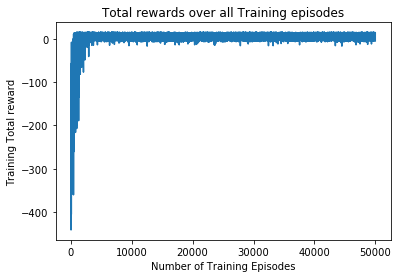

In [499]:
#Visualizing results and total reward over all episodes

plt.title('Total rewards over all Training episodes')
plt.xlabel('Number of Training Episodes')
plt.ylabel('Training Total reward')

plt.plot(range(episodesOfTraining) , all_episode_rewards)
plt.show()

### Conclusion & Discussion

After implementing the Q-learning and SARSA algorithms to solve this taxi problem, Q-learning does win by a tiny margin in terms of training score over time. For example, with episodesOfTraining set to 50000, Q-learning has a training score over time of 5.06716 versus 4.93652 of SARSA. (which are decent scores) With the same hyperparameters set, q-learning is consistently slightly outperforming SARSA. This means that for this taxi problem and its environment, the off policy Q-learning algorithm is the slightly better approach because it doesn't explore like SARSA. Q-learning exploits greedily as we can see in the implementation of my code. Specifically, it takes more risks to find an optimal solution wheras SARSA is more conservative and takes improved policies. I also printed the average reward per thousand episodes to make the comparison of the two algorithms even more apparent. It is interesting to note that by the time it got to near 50000 episodes of training, SARSA has a slightly higher average per thousand score. We can conclude that the difference between using the two algoithms for this taxi problem is quite negligible but Q-learning might have a slight edge.

### Troubleshooting

The most difficult part of this project is the fine tuning of hyperparameters for each RL algorithm. I have spent many hours tuning the alpha (learning rate), gamma (discount factor) and epsilon (exploration variable). After narrowing down the values a lot and with episodesOfTraining set at 50000, I have tried alpha = 0.1, gamma = 0.9 and epsilon = 0.5 which yielded a training score over time of 4.81114 for Q-learning and 4.76118 for SARSA. When I continued to experiment with alpha = 0.1, gamma = 0.9 and epsilon = 0.2, the training score over time improved to 5.1094 and 4.90674 respectively. I also tuned alpha and and gamma to optimize the scores for each algorithm. I also made sure to compare the Q-learning and SARSA algorithm with the same hyperparameters set to evaluate their performence for this taxi problem. Overall, large alpha (learning rate) benefits Q-learning a lot but is really terrible for SARSA. For example, for episodesOfTraining set at 5000, setting alpha to a bigger 0.8, gamma = 0.95 and epsilon = 0.2 gives a training score over time of 1.2424 for Q-learning and -9.6384 for SARSA, which is quite a big difference. After all the continuous fine tuning, I have arrived at alpha = 0.1, gamma = 0.9 and epsilon = 0.2

### Future Improvements

It is very useful to think about the tradeoffs of using different RL algorithms since different RL methods are better for solving different problems. For this taxi problem, I believe that using a deep learning method such as deep Q learning or SARSA (neural networks) can improve the scores but have the significant tradeoffs of memory and time.

### Demo and Time step Observation 

#### ----- You can adjust max_steps and epsiodesOfTesting for each algorithm below -----

#### Q-Learning

In [500]:
# Episodes for testing
episodesOfTesting = 2 

# Maximum steps per episode
max_steps = 25

Q = np.zeros((env.observation_space.n, env.action_space.n))

# Learning rate
alpha = 0.1

#Discount factor
gamma = 0.9 

# Exploration parameters
epsilon = 0.2                  
max_epsilon = 1
min_epsilon = 0.01         
decay = 0.001     

In [501]:
all_episode_rewards = []

for episode in range(episodesOfTesting):
    state = env.reset()    
    done = False
    reward_in_episode = 0   
    
    if epsilon > 0.01:
            epsilon = epsilon - decay
            
    for step in range(max_steps): 
        env.render()       
        threshold = random.uniform(0, 1)       
        if threshold > epsilon:
            action = np.argmax(Q[state,:])          
        else: 
            action = env.action_space.sample()  
        new_state, reward, done, info = env.step(action) 
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action]) 
        state = new_state
        reward_in_episode = reward_in_episode + reward  
        if done:
            break
            
    all_episode_rewards.append(reward_in_episode)
    

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |

#### SARSA

In [502]:
# Episodes for testing
episodesOfTesting = 2  

# Maximum steps per episode
max_steps = 25

Q = np.zeros((env.observation_space.n, env.action_space.n))

# Learning rate
alpha = 0.1

#Discount factor
gamma = 0.9 

# Exploration parameters
epsilon = 0.2                 
max_epsilon = 1
min_epsilon = 0.01         
decay = 0.001

In [503]:
all_episode_rewards = []

for episode in range(episodesOfTesting):
    state = env.reset()    
    done = False
    reward_in_episode = 0
    
    if epsilon > 0.01:
        epsilon = epsilon - decay
     
    if random.uniform(0, 1) > epsilon:
        action = np.argmax(Q[state,:]) 
    else: 
        action = env.action_space.sample()
        
    for step in range(max_steps):
        env.render()
        new_state, reward, done, info = env.step(action)
        if random.uniform(0, 1) > epsilon:
            new_action = np.argmax(Q[new_state,:])            
        else: 
            new_action = env.action_space.sample()
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[new_state, new_action] - Q[state, action]) 
        state = new_state
        action = new_action
        reward_in_episode = reward_in_episode + reward
        if done:
            break      
            
    all_episode_rewards.append(reward_in_episode)


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: 

#### Reference

https://gym.openai.com/

https://www.cse.unsw.edu.au/~cs9417ml/RL1/algorithms.html